In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import requests as req
import pandas as pd
import io
import seaborn as sns
sns.set_style('white')
sns.set_context('talk', font_scale=1.3)

http://data.worldbank.org/developers/climate-data-api

In [3]:
base_url = 'http://climatedataapi.worldbank.org/climateweb/rest/v1/country/{type}/{var}/{start}/{end}/{ISO3}.{ext}'
url = base_url.format(
    type='mavg', 
    var='tas', 
    start='1980', 
    end='1999', 
    ISO3='ISR',
    ext='CSV'
)
r = req.get(url)
r.ok

True

In [4]:
with io.StringIO(r.text) as f:
    data = pd.read_csv(f)
data.head()

,GCM,var,from_year,to_year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,bccr_bcm2_0,tas,1980,1999,8.594574,8.757947,12.575378,16.695300,20.413159,25.315222,27.475958,28.146106,25.143445,20.962109,14.431799,10.418817
1,cccma_cgcm3_1,tas,1980,1999,6.280994,8.580640,12.744287,16.525452,22.133356,27.515356,29.610681,29.197205,26.051501,20.656604,12.979272,7.531482
2,cnrm_cm3,tas,1980,1999,6.547192,8.257971,11.776349,15.438745,20.200446,23.843384,26.824713,28.402698,25.039374,20.125836,13.628564,8.344073
3,csiro_mk3_5,tas,1980,1999,12.499066,14.295117,17.515759,20.647864,24.000433,28.031116,29.410480,28.956171,25.853973,21.938806,16.611584,12.818268
4,gfdl_cm2_0,tas,1980,1999,7.266522,8.518323,11.639929,16.201721,19.158258,23.144568,25.228821,25.280566,22.753253,17.921765,12.754871,9.115472


In [5]:
data = pd.melt(
    data,  
    id_vars=['GCM', 'var', 'from_year', 'to_year'],    
    value_name='Temp.',
    var_name='Month'
)
data.head()

,GCM,var,from_year,to_year,Month,Temp.
0,bccr_bcm2_0,tas,1980,1999,Jan,8.594574
1,cccma_cgcm3_1,tas,1980,1999,Jan,6.280994
2,cnrm_cm3,tas,1980,1999,Jan,6.547192
3,csiro_mk3_5,tas,1980,1999,Jan,12.499066
4,gfdl_cm2_0,tas,1980,1999,Jan,7.266522


In [6]:
avg = data.groupby(by='Month')['Temp.'].mean()
avg = avg[['Jan', 'Feb', 'Mar', 'Apr', 'May' ,'Jun', 'Jul' ,'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
avg.head()

Month
Jan     8.991307
Feb    10.483740
Mar    13.659174
Apr    17.379219
May    21.429948
Name: Temp., dtype: float64

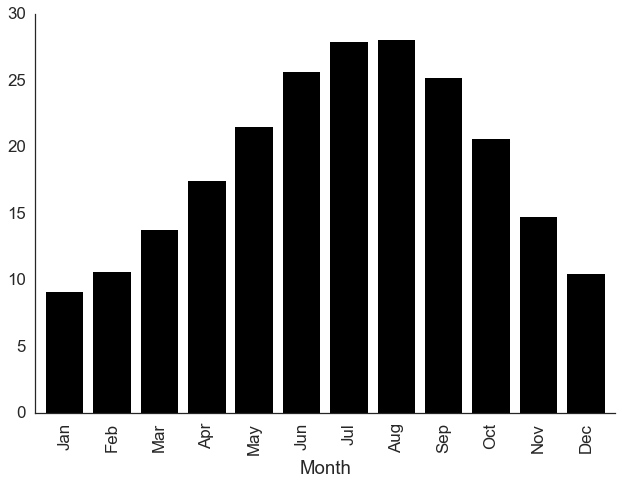

In [7]:
avg.plot.bar(color='k', width=0.75,  lw=2)
sns.despine()

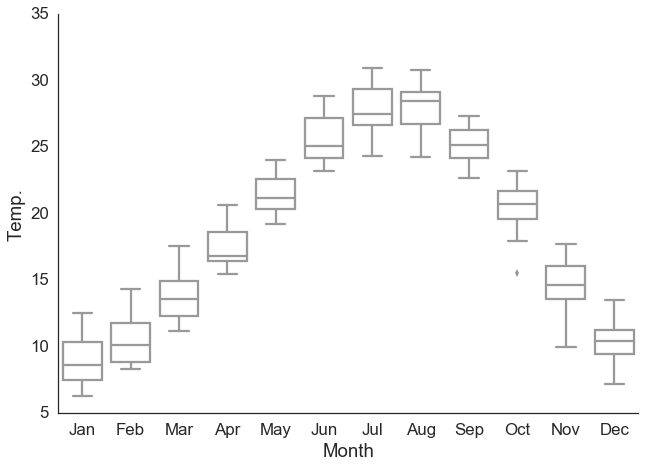

In [8]:
sns.boxplot(x='Month', y='Temp.', data=data, color='w')
sns.despine()

https://api.stackexchange.com/docs/tags

In [9]:
base_url = "https://api.stackexchange.com"
query = "/2.2/tags?page=1&pagesize=10&order=desc&sort=popular&site=stackoverflow"

r = req.get(base_url + query)
r.ok

True

In [10]:
r.json().keys()

dict_keys(['quota_remaining', 'items', 'quota_max', 'has_more'])

In [11]:
df = pd.DataFrame(r.json()['items'])
df

,count,has_synonyms,is_moderator_only,is_required,name
0,1059749,True,False,False,javascript
1,1019886,True,False,False,java
2,914569,True,False,False,c#
3,880898,True,False,False,php
4,796454,True,False,False,android
5,709341,True,False,False,jquery
6,538663,True,False,False,python
7,507920,True,False,False,html
8,429706,True,False,False,c++
9,412212,True,False,False,ios


In [12]:
query = '/2.2/tags?page=1&pagesize=1&order=desc&sort=popular&inname=matlab&site=stackoverflow'
r = req.get(base_url + query)
r.ok

True

In [13]:
df = pd.concat((df, pd.DataFrame(r.json()['items'])))
df.sort_values('count', ascending=False, inplace=True)
df

,count,has_synonyms,is_moderator_only,is_required,name
0,1059749,True,False,False,javascript
1,1019886,True,False,False,java
2,914569,True,False,False,c#
3,880898,True,False,False,php
4,796454,True,False,False,android
5,709341,True,False,False,jquery
6,538663,True,False,False,python
7,507920,True,False,False,html
8,429706,True,False,False,c++
9,412212,True,False,False,ios


In [14]:
python_idx = (df.name == 'python').values.argmax()
matlab_idx = (df.name == 'matlab').values.argmax()
print(python_idx, matlab_idx)

6 10


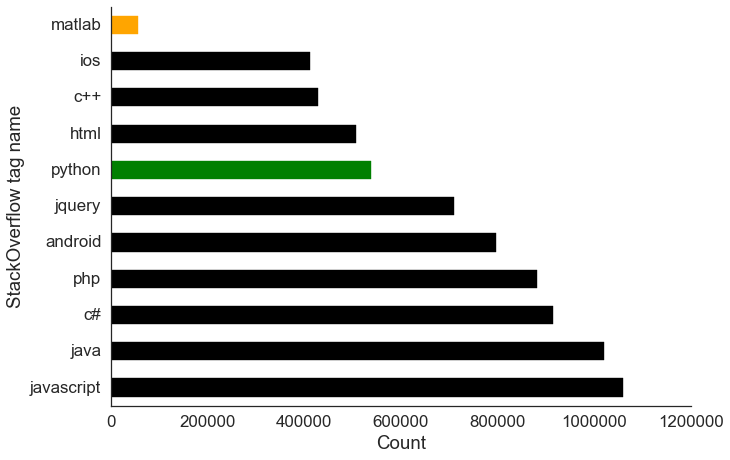

In [15]:
ax = df.plot.barh('name', 'count', color='k')
patches, labels = ax.get_legend_handles_labels()
patches[0][python_idx].set_color('green')
patches[0][matlab_idx].set_color('orange')
plt.ylabel('StackOverflow tag name')
plt.xlabel('Count')
plt.legend().set_visible(False)
sns.despine()